In [78]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')
print('Libraries Import Successful')

Libraries Import Successful


#### Customer Churn dataset is analyzed to  make actionable insights to retain customers and increase customers’ lifetime values
* find whether a customer will continue to use the telecom services or will leave the service provider
* Churn column : Customers who left within the last month - Yes, No
* Customer id, Gender, V1: Senior citizen, V2: Partners, V3:Dependents, V4: tenure V5: Phone Service
* V6: whether the customer has multiple lines ,  V7: Internet service, V8: Online security, V9: Online backup, V10: Device protection
* V11: Tech support , V12: Streming TV, V13: Streaming Movies, v14: Contract, V15: paperless billing,  V16: Customers mode of payment, V17: Monthly charges, V18:Total charges

In [79]:
Tdata=pd.read_csv('TelcoCustomerChurn.csv')
Tdata.head()

,customerID,gender,V1,V2,V3,V4,V5,V6,V7,V8,...,V10,V11,V12,V13,V14,V15,V16,V17,V18,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
Tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerID  7043 non-null   object 
 1   gender      7043 non-null   object 
 2   V1          7043 non-null   int64  
 3   V2          7043 non-null   object 
 4   V3          7043 non-null   object 
 5   V4          7043 non-null   int64  
 6   V5          7043 non-null   object 
 7   V6          7043 non-null   object 
 8   V7          7043 non-null   object 
 9   V8          7043 non-null   object 
 10  V9          7043 non-null   object 
 11  V10         7043 non-null   object 
 12  V11         7043 non-null   object 
 13  V12         7043 non-null   object 
 14  V13         7043 non-null   object 
 15  V14         7043 non-null   object 
 16  V15         7043 non-null   object 
 17  V16         7043 non-null   object 
 18  V17         7043 non-null   float64
 19  V18         7043 non-null  

In [81]:
Tdata.shape

(7043, 21)

In [82]:
#Lets write one function to find out missing values ,unique values ,data types
df=Tdata
df_U=df.nunique()
print(df_U.to_frame())      #this is series
df_U=df_U.to_frame().reset_index()
df_U
#df_U = df_U.rename(columns= {0: 'Unique Data'})   #renaming the 0 column tp Unique data
#first

               0
customerID  7043
gender         2
V1             2
V2             2
V3             2
V4            73
V5             2
V6             3
V7             3
V8             3
V9             3
V10            3
V11            3
V12            3
V13            3
V14            3
V15            2
V16            4
V17         1585
V18         6531
Churn          2


,index,0
0,customerID,7043
1,gender,2
2,V1,2
3,V2,2
4,V3,2
5,V4,73
6,V5,2
7,V6,3
8,V7,3
9,V8,3


In [87]:
def df_summary(df):
    df_U=df.nunique()
    df_M=df.isnull().sum()
    df_I=df.dtypes
    df_U=df_U.to_frame().reset_index()
    df_M=df_M.to_frame().reset_index()
    df_I=df_I.to_frame().reset_index()
    df_U = df_U.rename(columns= {0: 'Unique Data'})   #renaming the 0 column tp Unique data
    df_M = df_M.rename(columns= {0: 'Missing Data'})
    df_I = df_I.rename(columns= {0: 'Data Types'})
    #merge on index all the 3 dataframe, merge two first then third
    output = pd.merge(pd.merge(df_M,df_U,on='index'),df_I,on='index')
    return output

In [84]:
df_summary(Tdata)

,index,Missing Data,Unique Data,Data Types
0,customerID,0,7043,object
1,gender,0,2,object
2,V1,0,2,int64
3,V2,0,2,object
4,V3,0,2,object
5,V4,0,73,int64
6,V5,0,2,object
7,V6,0,3,object
8,V7,0,3,object
9,V8,0,3,object


* to_frame() method converts a series object to a python dataframe.
* So to reset the index to the default integer index beginning at 0, you can simply use the built-in reset_index () function. 
* This will make the integer index the default index and take the existing index and make it a column.
* Once the three dataframe are formed they are merged at a time

In [85]:
# All variable are looking good but Surprislingly amoung all the variable V18 having many classes and its categorical
# V17 also has more number but it is float type

Tdata.V18.head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: V18, dtype: object

In [88]:
#Seems the variables is wrongly classified as object data type .
#We will convert into Numerical

Tdata.V18= pd.to_numeric(Tdata.V18, errors='coerce')   
#wherever  parsing is not possible it makes NaN
Tdata.V18.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: V18, dtype: float64

In [89]:
type(Tdata['V1'])

pandas.core.series.Series

In [90]:
#Observe above  V18 has been changed to float64 and there are 11 missing values we fill the nanz too
Tdata['V18']=Tdata['V18'].fillna(Tdata['V18'].mean())
Tdata['V18'].isnull().sum()

0

In [91]:
#Drop cutomer id as not needed for analysis
Tdata.drop('customerID',axis=1, inplace=True)
Tdata.columns

Index(['gender', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'Churn'],
      dtype='object')

In [95]:
#Lets seperate Object Columns and Numerical Columns 
# create list of numeric and onject columns
Num_Cols=Tdata.select_dtypes(include=['float64','int64']).columns.tolist()
Cat_Cols=Tdata.select_dtypes(include=['object']).columns.tolist()
Num_Cols
#Cat_Cols

['V1', 'V4', 'V17', 'V18']

In [94]:
Tdata[Num_Cols].describe()

,V1,V4,V17,V18
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


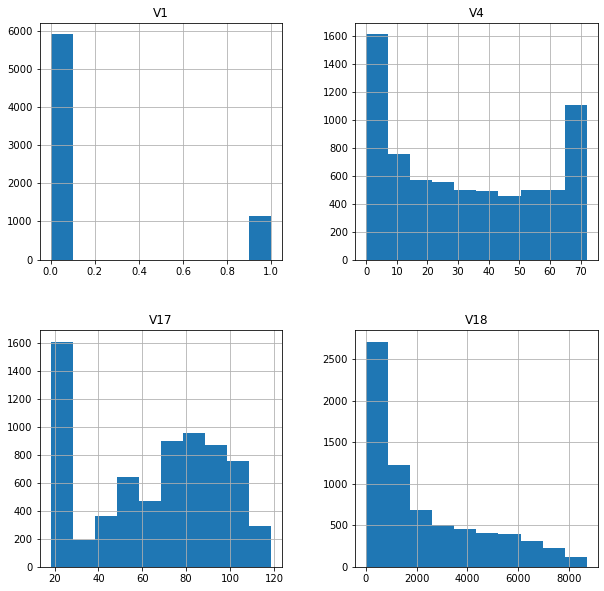

In [96]:
Tdata[Num_Cols].hist(figsize=(10,10))
plt.show()

In [97]:
Tdata[Cat_Cols].describe()

,gender,V2,V3,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


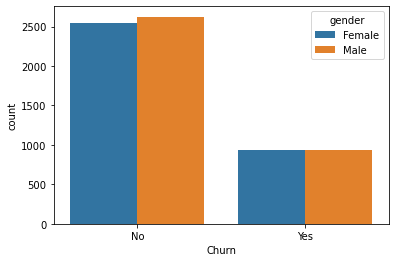

In [98]:
sns.countplot(x='Churn', hue='gender', data=Tdata);
# Gender doesnt decide whether a customer would churn

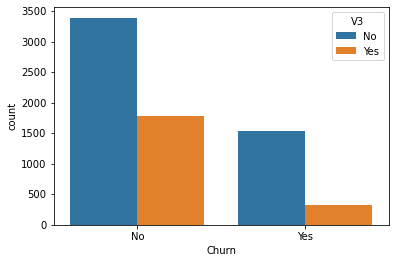

In [100]:
sns.countplot(x='Churn', hue='V3', data=Tdata);
# Gender doesnt decide whether a customer would churn

In [111]:
#Pull out the column names which have 2 and more than 2 categories
print(Tdata[Cat_Cols].nunique()[Tdata[Cat_Cols].nunique() == 2])
      
#[Tdata[Cat_Cols].nunique() == 2])
Binary_class = Tdata[Cat_Cols].nunique()[Tdata[Cat_Cols].nunique() == 2].keys().tolist()
Multi_class =  Tdata[Cat_Cols].nunique()[Tdata[Cat_Cols].nunique() > 2].keys().tolist()
print(Binary_class)
print(Multi_class)

gender    2
V2        2
V3        2
V5        2
V15       2
Churn     2
dtype: int64
['gender', 'V2', 'V3', 'V5', 'V15', 'Churn']
['V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16']


In [112]:
#Label encoding Binary Columns Yes No will ne changed to 0 and 1
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in Binary_class:
    Tdata[i]=le.fit_transform(Tdata[i])
    print(Tdata[i].head())

0    0
1    1
2    1
3    1
4    0
Name: gender, dtype: int32
0    1
1    0
2    0
3    0
4    0
Name: V2, dtype: int32
0    0
1    0
2    0
3    0
4    0
Name: V3, dtype: int32
0    0
1    1
2    1
3    0
4    1
Name: V5, dtype: int32
0    1
1    0
2    1
3    0
4    1
Name: V15, dtype: int32
0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32


In [116]:
#One-hot encoding is essentially the representation of categorical variables as binary vectors. 

Tdata_Dummy=pd.get_dummies(Tdata[Multi_class])   #used for categorical varaiables
Tdata_Dummy.head()
#will use  row of dataframe for headers
#Tdata_Dummy.shape

,V6_No,V6_No phone service,V6_Yes,V7_DSL,V7_Fiber optic,V7_No,V8_No,V8_No internet service,V8_Yes,V9_No,...,V13_No,V13_No internet service,V13_Yes,V14_Month-to-month,V14_One year,V14_Two year,V16_Bank transfer (automatic),V16_Credit card (automatic),V16_Electronic check,V16_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [115]:
#Merge the num_cols, binary_class and the Tdata_Dummy to form a single dataframe
final_df = pd.concat([Tdata[Num_Cols],Tdata[Binary_class],Tdata_Dummy], axis=1)
final_df.shape

(7043, 41)

Int64Index([0, 1], dtype='int64')
0    5174
1    1869
Name: Churn, dtype: int64


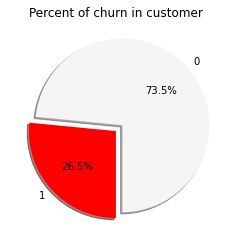

In [117]:
# Data to plot
#for each pie wedge, the format string is '1.1f%'.
labels =final_df['Churn'].value_counts(sort = True).index
print(labels)
sizes = final_df['Churn'].value_counts(sort = True)
print(sizes)
colors = ["whitesmoke","red"]
explode = (0.1,0)  # explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of churn in customer')
plt.show()


In [118]:
#Correlation
corr=final_df.corr()
print(corr.shape)

(41, 41)


In [121]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr,  dtype=bool)
print(mask)
mask[np.triu_indices_from(mask)] = True
print(mask)


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [False False  True ...  True  True  True]
 ...
 [False False False ...  True  True  True]
 [False False False ... False  True  True]
 [False False False ... False False  True]]


<AxesSubplot:>

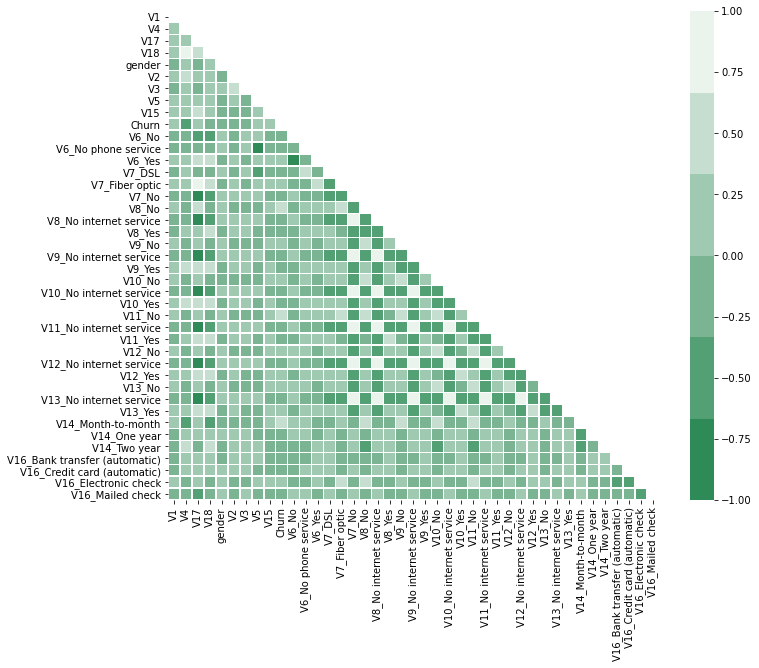

In [122]:
#we set the upper traingle as TRue
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

#generate a palette with darker colors represneting high color values
# Generate a custom diverging colormap
cmap=sns.light_palette("seagreen", reverse=True)

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, cmap=cmap, linewidths=.5)
plt.show()
#when we set mask=mask data will not be shown in the cells where maks is true

### Logistic Regression Model

In [126]:
#Step1:   Split the data
from sklearn.model_selection import train_test_split
#Split your target and descriptive features
X = final_df.drop(['Churn'],axis=1)
y = final_df["Churn"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_test.head()
X_test.shape
#X_train.shape

(1409, 40)

In [129]:
#Step2  Fit the model to the training data

from sklearn.linear_model import LogisticRegression

logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [130]:
logistic_model.coef_.shape

(1, 40)

In [131]:
#Predict the test dataset from the model
y_pred=logistic_model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 1]


[[942 119]
 [146 202]]
Figure(576x432) AxesSubplot(0.125,0.125;0.775x0.755)


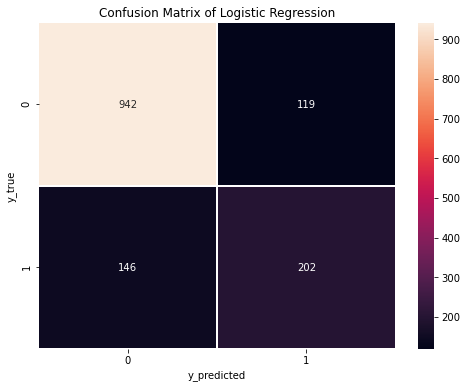

In [137]:
from sklearn.metrics import confusion_matrix

y_pred=logistic_model.predict(X_test)
#cm_lr = confusion_matrix(y_test,logistic_model.predict(X_test))
cm_lr = confusion_matrix(y_test,y_pred)
print(cm_lr)

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (8,6))
print(f,ax)
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

In [134]:
accuracy = logistic_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy*100)  
print((942+202)/(942+119+146+202))

Logistic Regression accuracy is : 81.19233498935415
0.8119233498935415


In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test,logistic_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1061
           1       0.63      0.58      0.60       348

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409

